# Making Experiments

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Feature Selection

In [2]:
dataset = sns.load_dataset('iris')
encoding_map = {'species': {'setosa': 0, 'versicolor': 1, 'virginica': 2}}
dataset.replace(encoding_map, inplace=True)

<Axes: >

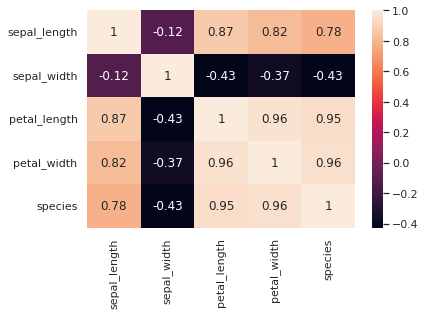

In [3]:
sns.heatmap(dataset.corr(), annot=True)

In [4]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
label = 'species'

X = dataset[features]
y = dataset[label]

## Manually Selecting

For classification: _chi2, f\_classif, mutual\_info\_classif_

For regression: _f\_regression, mutual_info_regression_



In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

feature_selection = SelectKBest(chi2, k=2)
feature_selection.fit(X, y)

transformedX = feature_selection.transform(X)
print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")

Old Shape: (150, 4) New shape: (150, 2)


In [6]:
feature_selection.scores_,  feature_selection.pvalues_

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [7]:
print('\t'.join(features))
print('\t '.join([f"{s:.5f}" for s in feature_selection.scores_]))
print('\t '.join([f"{p:.7f}" for p in feature_selection.pvalues_])) # significance factor, 0.05 - 95% 

sepal_length	sepal_width	petal_length	petal_width
10.81782	 3.71073	 116.31261	 67.04836
0.0044765	 0.1563960	 0.0000000	 0.0000000


## Automatically Selecting

For classification: _LogisticRegression, Linear\_SVC, or Trees_

For regression: _Lasso_


In [8]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier

In [9]:
feature_selection = SelectFromModel(LogisticRegression(tol=1e-1))
feature_selection.fit(X, y)

transformedX = feature_selection.transform(X)
print(f"New shape: {transformedX.shape}")

New shape: (150, 2)


In [10]:
print("Selected features: ", feature_selection.get_support())
print("Selected features: ", np.array(features)[feature_selection.get_support(indices=True)])

Selected features:  [False False  True  True]
Selected features:  ['petal_length' 'petal_width']


In [11]:
feature_selection = SelectFromModel(LinearSVC(tol=1e-1))
feature_selection.fit(X, y)

transformedX = feature_selection.transform(X)
print(f"New shape: {transformedX.shape}")

New shape: (150, 3)


In [12]:
print("Selected features: ", feature_selection.get_support())
print("Selected features: ", np.array(features)[feature_selection.get_support(indices=True)])

Selected features:  [False  True  True  True]
Selected features:  ['sepal_width' 'petal_length' 'petal_width']


In [13]:
feature_selection = SelectFromModel(DecisionTreeClassifier())
feature_selection.fit(X, y)

transformedX = feature_selection.transform(X)
print(f"New shape: {transformedX.shape}")

New shape: (150, 2)


In [14]:
print("Selected features: ", feature_selection.get_support())
print("Selected features: ", np.array(features)[feature_selection.get_support(indices=True)])

Selected features:  [False False  True  True]
Selected features:  ['petal_length' 'petal_width']


# Cross Validation - KFold

In [15]:
samples = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(samples)
print(f"Train: {train} \t Test: {test}")

Train: [4 9 3 8 7 1] 	 Test: [5 6 2]


In [17]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3, shuffle=True)

for train, test in kfold.split(samples):
  print(f"Train: {samples[train]} \t Test: {samples[test]}")

Train: [1 3 4 6 7 9] 	 Test: [2 5 8]
Train: [2 3 4 5 7 8] 	 Test: [1 6 9]
Train: [1 2 5 6 8 9] 	 Test: [3 4 7]


In [18]:
samples = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
kfold = KFold(n_splits=3, shuffle=True, random_state=7)

for train, test in kfold.split(samples):
  print(f"Train: {samples[train]} \t Test: {samples[test]}")

Train: [2 4 5 6 7 9] 	 Test: [1 3 8]
Train: [1 2 3 5 7 8] 	 Test: [4 6 9]
Train: [1 3 4 6 8 9] 	 Test: [2 5 7]


# Titanic

In [19]:
dataset = sns.load_dataset('titanic')
print(dataset.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [20]:
encoding_map = {'sex': {'male': 0, 'female': 1}, 
                'embarked': {'C':0, 'Q':1, 'S':2},
                'class': {'First':0, 'Second':1, 'Third':2},
                'who': {'child':0, 'man':1, 'woman':2},
                'deck': {'A': 0, 'B': 1, 'C': 2, 'D':3, 'E':4, 'F':5, 'G':6},
                'embark_town': {'Cherbourg': 0, 'Queenstown': 1, 'Southampton': 2},
                'alive': {'no':0, 'yes':1},
                }
dataset.replace(encoding_map, inplace=True)

In [21]:
# Replace NaN values
most_common_deck = dataset["deck"].value_counts().idxmax()
dataset["deck"].fillna(most_common_deck, inplace=True)

mean_age = dataset["age"].mean()
dataset["age"].fillna(mean_age, inplace=True)

most_common_embarked = dataset["embarked"].value_counts().idxmax()
dataset["embarked"].fillna(most_common_embarked, inplace=True)

most_common_embarked = dataset["embark_town"].value_counts().idxmax()
dataset["embark_town"].fillna(most_common_embarked, inplace=True)

## Select the features

In [22]:
features = [feature for feature in dataset.columns if feature != 'alive']
features = [feature for feature in features if feature != 'survived']
label = 'survived'

X = dataset[features].values
y = dataset[label].values

In [23]:
# Normalization / standardization
X = (X - X.mean()) / X.std()

In [24]:
print(X[:5])

[[-0.152117824591769 -0.3199369006353968 0.9107363236845404
  -0.2639972086208542 -0.3199369006353968 0.08562586647003702
  -0.2080575166063116 -0.2080575166063116 -0.2639972086208542
  -0.2639972086208542 -0.2080575166063116 -0.2080575166063116
  -0.3199369006353968]
 [-0.2639972086208542 -0.2639972086208542 1.805771395917222
  -0.2639972086208542 -0.3199369006353968 3.6676289471448467
  -0.3199369006353968 -0.3199369006353968 -0.2080575166063116
  -0.3199369006353968 -0.2080575166063116 -0.3199369006353968
  -0.3199369006353968]
 [-0.152117824591769 -0.2639972086208542 1.1344950917427108
  -0.3199369006353968 -0.3199369006353968 0.12338515857985326
  -0.2080575166063116 -0.2080575166063116 -0.2080575166063116
  -0.3199369006353968 -0.2080575166063116 -0.2080575166063116
  -0.2639972086208542]
 [-0.2639972086208542 -0.2639972086208542 1.6379523198735941
  -0.2639972086208542 -0.3199369006353968 2.650460745336815
  -0.2080575166063116 -0.3199369006353968 -0.2080575166063116
  -0.319936

In [25]:
best_features = SelectFromModel(DecisionTreeClassifier())
best_features.fit(X, y)

transformedX = best_features.transform(X)
print(f"Old Shape: {X.shape}, New shape: {transformedX.shape}")

Old Shape: (891, 13), New shape: (891, 4)


In [26]:
print("Selected features: ", best_features.get_support())
print("Selected features: ", np.array(features)[best_features.get_support(indices=True)])

Selected features:  [False False  True False False  True False  True False  True False False
 False]
Selected features:  ['age' 'fare' 'class' 'adult_male']


In [27]:
transformedX[:5]

array([[0.9107363236845404, 0.08562586647003702, -0.2080575166063116,
        -0.2639972086208542],
       [1.805771395917222, 3.6676289471448467, -0.3199369006353968,
        -0.3199369006353968],
       [1.1344950917427108, 0.12338515857985326, -0.2080575166063116,
        -0.3199369006353968],
       [1.6379523198735941, 2.650460745336815, -0.3199369006353968,
        -0.3199369006353968],
       [1.6379523198735941, 0.13037762008167111, -0.2080575166063116,
        -0.2639972086208542]], dtype=object)

## Creating model

In [28]:
# you may get same split every time by random state
cv = KFold(n_splits=10, shuffle=True, random_state=13) 

accuracies_all = []
for train, test in cv.split(X):
  model_all = DecisionTreeClassifier()
  model_all.fit(X[train], y[train])       # with all features 

  scr = model_all.score(X[test], y[test])
  accuracies_all.append(scr)

print(f"Mean of experiment scores: {np.mean(accuracies_all)}")

Mean of experiment scores: 0.785605493133583


In [29]:
# you may get same split every time by random state
cv = KFold(n_splits=10, shuffle=True, random_state=13) 

accuracies_trim = []
for train, test in cv.split(transformedX):
  model_trim = DecisionTreeClassifier()
  model_trim.fit(transformedX[train], y[train]) # with selected features

  scr = model_trim.score(transformedX[test], y[test])
  accuracies_trim.append(scr)

print(f"Mean of experiment scores: {np.mean(accuracies_trim)}")

Mean of experiment scores: 0.792334581772784


### Is selected features robust enough?

In [30]:
pass

### How do we evaluate the significance?

In [31]:
accuracies_all

[0.8111111111111111,
 0.797752808988764,
 0.797752808988764,
 0.797752808988764,
 0.7303370786516854,
 0.7191011235955056,
 0.8089887640449438,
 0.797752808988764,
 0.8539325842696629,
 0.7415730337078652]

In [32]:
accuracies_trim

[0.8222222222222222,
 0.8314606741573034,
 0.7640449438202247,
 0.8426966292134831,
 0.7078651685393258,
 0.7752808988764045,
 0.8202247191011236,
 0.7640449438202247,
 0.8539325842696629,
 0.7415730337078652]

In [33]:
import scipy.stats as stats

confident_acc = stats.t.interval(confidence=0.95, # confidence rate
                                 df=len(accuracies_all)-1,
                                 loc=np.mean(accuracies_all), 
                                 scale=stats.sem(accuracies_all))

print("All features: ", confident_acc, np.mean(confident_acc))
print(f"Accuracy in %95 confidence {np.mean(confident_acc)}+-{np.mean(confident_acc) - confident_acc[0]}")  

All features:  (0.7555638901392684, 0.8156470961278975) 0.785605493133583
Accuracy in %95 confidence 0.785605493133583+-0.030041602994314576


In [34]:
confident_acc = stats.t.interval(confidence=0.95, # confidence rate
                                 df=len(accuracies_trim)-1,
                                 loc=np.mean(accuracies_trim), 
                                 scale=stats.sem(accuracies_trim))

print("Selected features: ", confident_acc, np.mean(confident_acc))
print(f"Accuracy in %95 confidence {np.mean(confident_acc)}+-{np.mean(confident_acc) - confident_acc[0]}") 

Selected features:  (0.7576679439837414, 0.8270012195618267) 0.792334581772784
Accuracy in %95 confidence 0.792334581772784+-0.034666637789042665


In [35]:
stats.ttest_ind(accuracies_all, accuracies_trim)

Ttest_indResult(statistic=-0.33183937064693525, pvalue=0.7438432301360747)

In [36]:
perfect_acc = np.ones(10)
stats.ttest_ind(accuracies_all, perfect_acc)

<ipython-input-36-7ad455eb4d39>:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stats.ttest_ind(accuracies_all, perfect_acc)


Ttest_indResult(statistic=-16.144080908464627, pvalue=3.745166612231816e-12)

## Hyper-parameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': range(1,5), 
              'min_samples_split': range(2,8), 
              'min_samples_leaf': range(2, 8)}

gcv = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10).fit(transformedX, y)

In [38]:
pandas.DataFrame(gcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002248,0.001579,0.001386,0.001051,1,2,2,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.766667,0.831461,...,0.853933,0.797753,0.786517,0.775281,0.719101,0.820225,0.786517,0.789026,0.037371,109
1,0.002067,0.000809,0.001282,0.000829,1,2,3,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.766667,0.831461,...,0.853933,0.797753,0.786517,0.775281,0.719101,0.820225,0.786517,0.789026,0.037371,109
2,0.001778,0.000648,0.001219,0.000704,1,2,4,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.766667,0.831461,...,0.853933,0.797753,0.786517,0.775281,0.719101,0.820225,0.786517,0.789026,0.037371,109
3,0.001523,0.000100,0.000923,0.000034,1,2,5,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.766667,0.831461,...,0.853933,0.797753,0.786517,0.775281,0.719101,0.820225,0.786517,0.789026,0.037371,109
4,0.001770,0.000174,0.001791,0.002042,1,2,6,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.766667,0.831461,...,0.853933,0.797753,0.786517,0.775281,0.719101,0.820225,0.786517,0.789026,0.037371,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.001293,0.000130,0.000577,0.000041,4,7,3,"{'max_depth': 4, 'min_samples_leaf': 7, 'min_s...",0.811111,0.853933,...,0.853933,0.808989,0.808989,0.831461,0.786517,0.865169,0.853933,0.823808,0.031709,49
140,0.001234,0.000043,0.000562,0.000017,4,7,4,"{'max_depth': 4, 'min_samples_leaf': 7, 'min_s...",0.811111,0.853933,...,0.853933,0.808989,0.808989,0.831461,0.786517,0.865169,0.853933,0.823808,0.031709,49
141,0.002753,0.001794,0.001982,0.001731,4,7,5,"{'max_depth': 4, 'min_samples_leaf': 7, 'min_s...",0.811111,0.853933,...,0.853933,0.808989,0.808989,0.831461,0.786517,0.865169,0.853933,0.823808,0.031709,49
142,0.002826,0.002293,0.001019,0.000093,4,7,6,"{'max_depth': 4, 'min_samples_leaf': 7, 'min_s...",0.811111,0.853933,...,0.853933,0.808989,0.808989,0.831461,0.786517,0.865169,0.853933,0.823808,0.031709,49


In [39]:
print(f"Best Estimator: {gcv.best_estimator_}")
print(f"Best Parameter: {gcv.best_params_}")
print(f"Best Score: {gcv.best_score_}")

Best Estimator: DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)
Best Parameter: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.828302122347066
